In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pandas as pd
plt.style.use("seaborn-darkgrid")

## Validation accuracy performance of active learning on ASL

In [2]:
#validation performance of ASL ACTIVE LEARNING
data_bald = np.load("ASL_val_result_npy/bald-MC_dropout=True.npy")
data_max_entropy = np.load("ASL_val_result_npy/max_entropy-MC_dropout=True.npy")
data_mean_std = np.load("ASL_val_result_npy/mean_std-MC_dropout=True.npy"ass)
data_uniform = np.load("ASL_val_result_npy/uniform-MC_dropout=True.npy")
data_var_ratios = np.load("ASL_val_result_npy/var_ratios-MC_dropout=True.npy")
data = {"bald": data_bald, "max_entropy": data_max_entropy, "mean_std": data_mean_std,"uniform": data_uniform, "var_ratios": data_var_ratios}

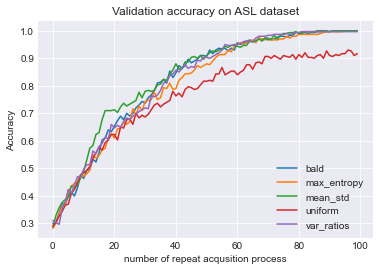

In [3]:
#data = {"bald": data_bald, "max_entropy": data_max_entropy, "mean_std": data_mean_std, "var_ratios": data_var_ratios}
for key in data.keys():
    plt.plot(data[key][:100], label=key)
plt.legend()
plt.title("Validation accuracy on ASL dataset")
plt.xlabel("number of repeat acqusition process")
plt.ylabel("Accuracy")
plt.show()

## Validation accuracy performance of bsl active learning

In [4]:
#validation performance of ACTIVE LEARNING on BSL dataset
data_bald = np.load("BSL_result_npy/bald-MC_dropout=True.npy")
data_max_entropy = np.load("BSL_result_npy/max_entropy-MC_dropout=True.npy")
#data_mean_std = np.load("result_npy_BSL/mean_std-MC_dropout=True.npy")
data_uniform = np.load("BSL_result_npy/uniform-MC_dropout=True.npy")
data_var_ratios = np.load("BSL_result_npy/var_ratios-MC_dropout=True.npy")
data = {"bald": data_bald, "max_entropy": data_max_entropy, 
        #"mean_std": data_mean_std,
        "uniform": data_uniform, "var_ratios": data_var_ratios}

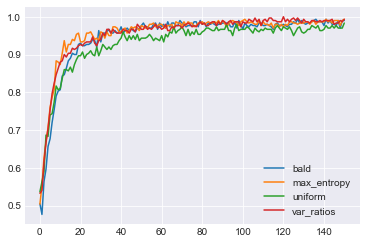

In [5]:
#data = {"bald": data_bald, "max_entropy": data_max_entropy, "mean_std": data_mean_std, "var_ratios": data_var_ratios}
for key in data.keys():
    plt.plot(data[key], label=key)
plt.legend()
plt.show()

## validation performance of MNIST ACTIVE LEARNING

In [26]:
#validation performance of MNIST ACTIVE LEARNING
data_bald = np.load("result_npy/bald-MC_dropout=TrueMNIST.npy")
data_max_entropy = np.load("result_npy/max_entropy-MC_dropout=TrueMNIST.npy")
#data_mean_std = np.load("result_npy/mean_std-MC_dropout=TrueMNIST.npy")
data_uniform = np.load("result_npy/uniform-MC_dropout=TrueMNIST.npy")
data_var_ratios = np.load("result_npy/var_ratios-MC_dropout=TrueMNIST.npy")
data = {"bald": data_bald, "max_entropy": data_max_entropy, 
        #"mean_std": data_mean_std,
        "uniform": data_uniform, "var_ratios": data_var_ratios}

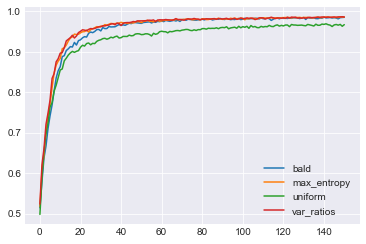

In [27]:
#data = {"bald": data_bald, "max_entropy": data_max_entropy, "mean_std": data_mean_std, "var_ratios": data_var_ratios}
for key in data.keys():
    plt.plot(data[key], label=key)
plt.legend()
plt.show()

In [54]:
#Test performance of ASL ACTIVE LEARNING
data_bald = np.load("result_npy/bald-MC_dropout=TrueASL_MNIST.npy")
data_max_entropy = np.load("result_npy/max_entropy-MC_dropout=TrueASL_MNIST.npy")
data_mean_std = np.load("result_npy/mean_std-MC_dropout=TrueASL_MNIST.npy")
data_uniform = np.load("result_npy/uniform-MC_dropout=TrueASL_MNIST.npy")
data_var_ratios = np.load("result_npy/var_ratios-MC_dropout=TrueASL_MNIST.npy")
data = {"bald": data_bald, "max_entropy": data_max_entropy, 
        "mean_std": data_mean_std,
        "uniform": data_uniform, "var_ratios": data_var_ratios}

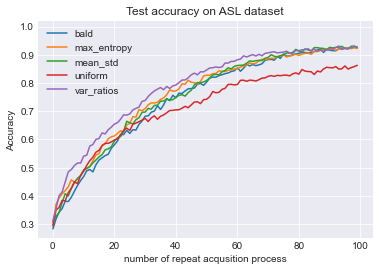

In [62]:
#data = {"bald": data_bald, "max_entropy": data_max_entropy, "mean_std": data_mean_std, "var_ratios": data_var_ratios}
for key in data.keys():
    plt.plot(data[key][:100], label=key)
plt.legend()
plt.title("Test accuracy on ASL dataset")
plt.xlabel("number of repeat acqusition process")
plt.ylabel("Accuracy")
plt.ylim([0.25,1.02])
plt.show()

## VISUALIZE the confusion matrix imbalanced 0.4*1

In [5]:
#Confusion matrix for 0.4 weighted 
con_bald = np.genfromtxt("confusion_matrix/ASL_weighted_samlped_matrix/con_mat_bald.csv", delimiter=',')
con_max_entropy = np.genfromtxt("confusion_matrix/ASL_weighted_samlped_matrix/con_mat_max_entropy.csv", delimiter=',')
con_mean_std = np.genfromtxt("confusion_matrix/ASL_weighted_samlped_matrix/con_mat_mean_std.csv", delimiter=',')
con_uniform = np.genfromtxt("confusion_matrix/ASL_weighted_samlped_matrix/con_mat_uniform.csv", delimiter=',')
con_var_ratios = np.genfromtxt("confusion_matrix/ASL_weighted_samlped_matrix/con_mat_var_ratios.csv", delimiter=',')

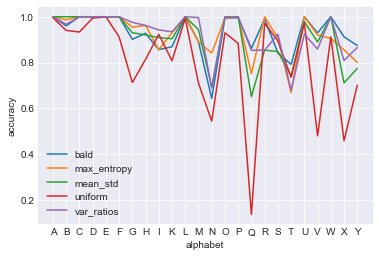

In [6]:
# plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(con_bald,annot=True, annot_kws={"size": 10})
accuracy_bald =con_bald.diagonal()/con_bald.sum(axis=1)
accuracy_max_entropy =con_max_entropy.diagonal()/con_bald.sum(axis=1)
accuracy_mean_std =con_mean_std.diagonal()/con_bald.sum(axis=1)
accuracy_uniform =con_uniform.diagonal()/con_bald.sum(axis=1)
accuracy_var_ratios =con_var_ratios.diagonal()/con_bald.sum(axis=1)

miss_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]

figure, ax = plt.subplots(1,1)
ax.plot([i for i in range(24)], accuracy_bald, label="bald")
ax.plot([i for i in range(24)], accuracy_max_entropy, label="max_entropy")
ax.plot([i for i in range(24)], accuracy_mean_std, label="mean_std")
ax.plot([i for i in range(24)], accuracy_uniform, label="uniform")
ax.plot([i for i in range(24)], accuracy_var_ratios, label="var_ratios")



plt.xticks([i for i in range(24)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( miss_Alphabet_list )
ax.legend()

## VISUALIZE the imbalanced confusion matrix 1

In [22]:
#Confusion matrix for 1 weighted 
full_con_bald = np.genfromtxt("confusion_matrix/ASL_full_weighted_samlped_matrix/ASL_MNIST_imbalcon_mat_bald_.csv", delimiter=',')
full_con_max_entropy = np.genfromtxt("confusion_matrix/ASL_full_weighted_samlped_matrix/ASL_MNIST_imbalcon_max_max_entropy.csv", delimiter=',')
full_con_mean_std = np.genfromtxt("confusion_matrix/ASL_full_weighted_samlped_matrix/ASL_MNIST_imbalcon_mat_mean_std.csv", delimiter=',')
full_con_uniform = np.genfromtxt("confusion_matrix/ASL_full_weighted_samlped_matrix/ASL_MNIST_imbalcon_mat_uniform.csv", delimiter=',')
full_con_var_ratios = np.genfromtxt("confusion_matrix/ASL_full_weighted_samlped_matrix/ASL_MNIST_imbalcon_mat_var_ratios.csv", delimiter=',')

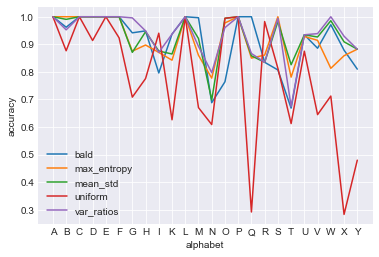

In [8]:
# plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(con_bald,annot=True, annot_kws={"size": 10})
accuracy_bald =full_con_bald.diagonal()/full_con_bald.sum(axis=1)
accuracy_max_entropy =full_con_max_entropy.diagonal()/full_con_bald.sum(axis=1)
accuracy_mean_std =full_con_mean_std.diagonal()/full_con_bald.sum(axis=1)
accuracy_uniform =full_con_uniform.diagonal()/full_con_bald.sum(axis=1)
accuracy_var_ratios =full_con_var_ratios.diagonal()/full_con_bald.sum(axis=1)

miss_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]

figure, ax = plt.subplots(1,1)
ax.plot([i for i in range(24)], accuracy_bald, label="bald")
ax.plot([i for i in range(24)], accuracy_max_entropy, label="max_entropy")
ax.plot([i for i in range(24)], accuracy_mean_std, label="mean_std")
ax.plot([i for i in range(24)], accuracy_uniform, label="uniform")
ax.plot([i for i in range(24)], accuracy_var_ratios, label="var_ratios")



plt.xticks([i for i in range(24)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( miss_Alphabet_list )
ax.legend()

## VISUALIZE the balanced confusion matrix 1

In [24]:
#Confusion matrix for 1 unweighted 
full_unwei_con_bald = np.genfromtxt("confusion_matrix/ASL_full_unweighted_sampled_matrix/unwei_ASL_MNISTcon_mat_bald.csv", delimiter=',')
full_unwei_con_max_entropy = np.genfromtxt("confusion_matrix/ASL_full_unweighted_sampled_matrix/unwei_ASL_MNISTcon_mat_max_entropy.csv", delimiter=',')
full_unwei_con_mean_std = np.genfromtxt("confusion_matrix/ASL_full_unweighted_sampled_matrix/unwei_ASL_MNISTcon_mat_mean_std.csv", delimiter=',')
full_unwei_con_uniform = np.genfromtxt("confusion_matrix/ASL_full_unweighted_sampled_matrix/unwei_ASL_MNISTcon_mat_uniform.csv", delimiter=',')
full_unwei_con_var_ratios = np.genfromtxt("confusion_matrix/ASL_full_unweighted_sampled_matrix/unwei_ASL_MNISTcon_mat_var_ratios.csv", delimiter=',')

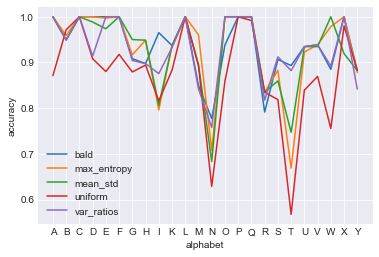

In [25]:
# plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(con_bald,annot=True, annot_kws={"size": 10})
accuracy_bald =full_unwei_con_bald.diagonal()/full_unwei_con_bald.sum(axis=1)
accuracy_max_entropy =full_unwei_con_max_entropy.diagonal()/full_unwei_con_max_entropy.sum(axis=1)
accuracy_mean_std =full_unwei_con_mean_std.diagonal()/full_unwei_con_mean_std.sum(axis=1)
accuracy_uniform =full_unwei_con_uniform.diagonal()/full_unwei_con_uniform.sum(axis=1)
accuracy_var_ratios =full_unwei_con_var_ratios.diagonal()/full_unwei_con_var_ratios.sum(axis=1)

miss_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]

figure, ax = plt.subplots(1,1)
ax.plot([i for i in range(24)], accuracy_bald, label="bald")
ax.plot([i for i in range(24)], accuracy_max_entropy, label="max_entropy")
ax.plot([i for i in range(24)], accuracy_mean_std, label="mean_std")
ax.plot([i for i in range(24)], accuracy_uniform, label="uniform")
ax.plot([i for i in range(24)], accuracy_var_ratios, label="var_ratios")



plt.xticks([i for i in range(24)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( miss_Alphabet_list )
ax.legend()

## Visualize the weighted GSL result 

In [22]:
#Confusion matrix for 1 unweighted 
full_unwei_con_bald = np.genfromtxt("confusion_matrix/GSL_full_weighted_sampled_matrix/GSL_MNIST_imbalcon_matbald.csv", delimiter=',')
full_unwei_con_max_entropy = np.genfromtxt("confusion_matrix/GSL_full_weighted_sampled_matrix/GSL_MNIST_imbalcon_matmax_.csv", delimiter=',')
full_unwei_con_mean_std = np.genfromtxt("confusion_matrix/GSL_full_weighted_sampled_matrix/GSL_MNIST_imbalcon_matmean.csv", delimiter=',')
full_unwei_con_uniform = np.genfromtxt("confusion_matrix/GSL_full_weighted_sampled_matrix/GSL_MNIST_imbalcon_matunif.csv", delimiter=',')
full_unwei_con_var_ratios = np.genfromtxt("confusion_matrix/GSL_full_weighted_sampled_matrix/GSL_MNIST_imbalcon_matvar_.csv", delimiter=',')

sum(full_unwei_con_max_entropy.diagonal())/sum(sum(full_unwei_con_max_entropy))

0.6110414052697616

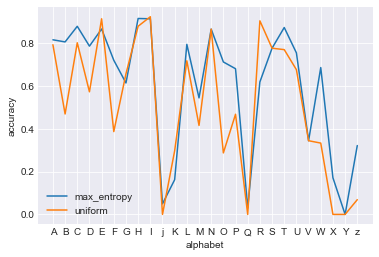

In [8]:
# plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(con_bald,annot=True, annot_kws={"size": 10})
#accuracy_bald =full_unwei_con_bald.diagonal()/full_unwei_con_bald.sum(axis=1)
GSL_laccuracy_max_entropy =full_unwei_con_max_entropy.diagonal()/full_unwei_con_max_entropy.sum(axis=1)
#accuracy_mean_std =full_unwei_con_mean_std.diagonal()/full_unwei_con_mean_std.sum(axis=1)
GSL_accuracy_uniform =full_unwei_con_uniform.diagonal()/full_unwei_con_uniform.sum(axis=1)
#accuracy_var_ratios =full_unwei_con_var_ratios.diagonal()/full_unwei_con_var_ratios.sum(axis=1)

all_Alphabet_list=["A","B","C","D","E","F","G","H","I","j","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","z"]

figure, ax = plt.subplots(1,1)
#ax.plot([i for i in range(26)], accuracy_bald, label="bald")
ax.plot([i for i in range(26)], GSL_laccuracy_max_entropy, label="max_entropy")
#ax.plot([i for i in range(26)], accuracy_mean_std, label="mean_std")
ax.plot([i for i in range(26)], GSL_accuracy_uniform, label="uniform")
#ax.plot([i for i in range(26)], accuracy_var_ratios, label="var_ratios")

plt.xticks([i for i in range(26)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( all_Alphabet_list )
ax.legend()

## Visualize the weighted ASL + GSL train together(same conv and classifier) result 

In [23]:
#Confusion matrix for 1 unweighted 
full_unwei_con_max_entropy = np.genfromtxt("confusion_matrix/ASL_GSL_weighted_sampled_matrix/ASL_GSL_MNIST_imbalcon_matmax_.csv", delimiter=',')
full_unwei_con_uniform = np.genfromtxt("confusion_matrix/ASL_GSL_weighted_sampled_matrix/ASL_GSL_MNIST_imbalcon_matunif.csv", delimiter=',')
sum(full_unwei_con_max_entropy.diagonal())/sum(sum(full_unwei_con_max_entropy))


0.699289000418235

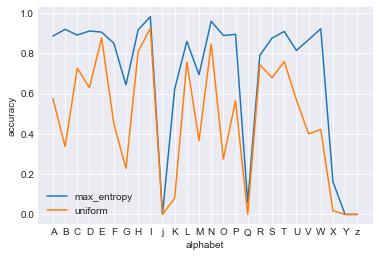

In [24]:
A_GSL_accuracy_max_entropy =full_unwei_con_max_entropy.diagonal()/full_unwei_con_max_entropy.sum(axis=1)
A_GSL_accuracy_uniform =full_unwei_con_uniform.diagonal()/full_unwei_con_uniform.sum(axis=1)

all_Alphabet_list=["A","B","C","D","E","F","G","H","I","j","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","z"]

figure, ax = plt.subplots(1,1)

ax.plot([i for i in range(26)], A_GSL_accuracy_max_entropy, label="max_entropy")
ax.plot([i for i in range(26)], A_GSL_accuracy_uniform, label="uniform")

plt.xticks([i for i in range(26)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( all_Alphabet_list )
ax.legend()

## Comparsion of ASL and GSL

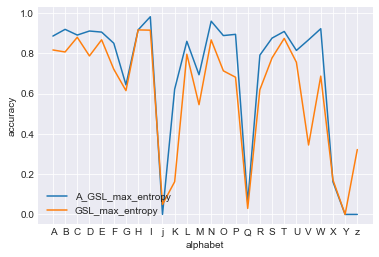

In [25]:
figure, ax = plt.subplots(1,1)

ax.plot([i for i in range(26)], A_GSL_accuracy_max_entropy, label="A_GSL_max_entropy")
#ax.plot([i for i in range(26)], A_GSL_accuracy_uniform, label="A_GSL_uniform")
ax.plot([i for i in range(26)], GSL_laccuracy_max_entropy, label="GSL_max_entropy")
#ax.plot([i for i in range(26)], GSL_accuracy_uniform, label="GSL_uniform")

plt.xticks([i for i in range(26)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( all_Alphabet_list )
ax.legend(loc=3)

### Compare Irish and Irish+GSL_pretrain 

In [50]:
#Confusion matrix for 1 unweighted 
Irish_scratch_var = np.genfromtxt("con_mat/con_mat_Irish_SL_MNIST_imbal_novar_.csv", delimiter=',')
Irish_GSL_pre_var = np.genfromtxt("con_mat/con_mat_Irish_SL_MNIST_imbal_yesvar_.csv", delimiter=',')
sum(Irish_scratch_var.diagonal())/sum(sum(Irish_scratch_var))
print("Accuracy for training from scratcch is :", sum(Irish_scratch_var.diagonal())/sum(sum(Irish_scratch_var)))
,
sum(Irish_GSL_pre_var.diagonal())/sum(sum(Irish_GSL_pre_var))
print("Accuracy for using pretrained model is :", sum(Irish_GSL_pre_var.diagonal())/sum(sum(Irish_GSL_pre_var)))

Irish_scratch_var =Irish_scratch_var.diagonal()/Irish_scratch_var.sum(axis=1)
Irish_GSL_pre_var =Irish_GSL_pre_var.diagonal()/Irish_GSL_pre_var.sum(axis=1)
print(len(Irish_GSL_pre_var))

Accuracy for training from scratcch is : 0.9580258302583026
Accuracy for using pretrained model is : 0.9921586715867159
24


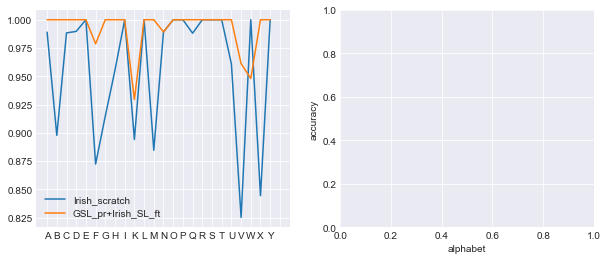

In [64]:
all_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]

figure, [ax1,ax2] = plt.subplots(1,2)
figure.set_size_inches(10, 4)

ax1.plot([i for i in range(24)], Irish_scratch_var, label="Irish_scratch")
ax1.plot([i for i in range(24)], Irish_GSL_pre_var, label="GSL_pr+Irish_SL_ft")

ax1.set_xticks([i for i in range(26)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax1.set_xticklabels( all_Alphabet_list )
ax1.legend(loc=3)

## Compare ASL and ASL+GSL_pretrain

In [46]:
#Confusion matrix for 1 unweighted 
ASL_scratch_var = np.genfromtxt("con_mat/con_mat_ASL_MNIST_imbal_novar_.csv", delimiter=',')
ASL_GSL_pre_var = np.genfromtxt("con_mat/con_mat_ASL_MNIST_imbal_yesvar_.csv", delimiter=',')
sum(ASL_scratch_var.diagonal())/sum(sum(ASL_scratch_var))
print("Accuracy for training from scratcch is :", sum(ASL_scratch_var.diagonal())/sum(sum(ASL_scratch_var)))
,
sum(ASL_GSL_pre_var.diagonal())/sum(sum(ASL_GSL_pre_var))
print("Accuracy for using pretrained model is :", sum(ASL_GSL_pre_var.diagonal())/sum(sum(ASL_GSL_pre_var)))

ASL_scratch_var =ASL_scratch_var.diagonal()/ASL_scratch_var.sum(axis=1)
ASL_GSL_pre_var =ASL_GSL_pre_var.diagonal()/ASL_GSL_pre_var.sum(axis=1)
print(len(ASL_GSL_pre_var))

Accuracy for training from scratcch is : 0.92
Accuracy for using pretrained model is : 0.9494
24


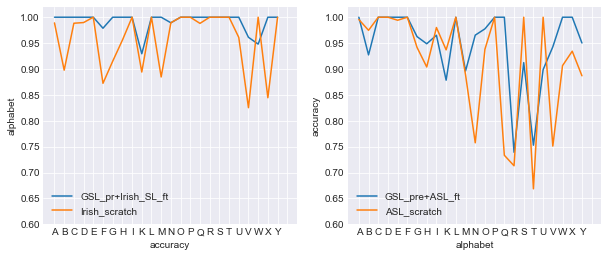

In [78]:
all_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]

figure, [ax1,ax2] = plt.subplots(1,2)
figure.set_size_inches(10, 4)

ax1.plot([i for i in range(24)], Irish_GSL_pre_var, label="GSL_pr+Irish_SL_ft")
ax1.plot([i for i in range(24)], Irish_scratch_var, label="Irish_scratch")

ax1.set_xticks([i for i in range(26)])
ax1.set_ylim([0.6, 1.02])
ax1.set_xlabel("accuracy")
ax1.set_ylabel("alphabet")
ax1.set_xticklabels( all_Alphabet_list )
ax1.legend(loc=3)



ax2.plot([i for i in range(24)], ASL_GSL_pre_var, label="GSL_pre+ASL_ft")
ax2.plot([i for i in range(24)], ASL_scratch_var, label="ASL_scratch")
ax2.set_xticks([i for i in range(26)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax2.set_xticklabels( all_Alphabet_list )
ax2.set_ylim([0.6, 1.02])
ax2.legend(loc=3)

### ASL

In [30]:
from matplotlib.ticker import FormatStrFormatter
def make_plot(SL, unif, bald, maxX, mean,var, query, training_data,full_performance):
    unif_mean = np.mean(unif,axis=0 )
    unif_std = [np.std(unif[:,i]) for i in range(unif.shape[1])]
    unif_ci = [1.96 * i/np.sqrt(unif.shape[0]) for i in unif_std]
    
    var_std = [np.std(var[:,i]) for i in range(var.shape[1])]
    unif_ci = [1.96 * i/np.sqrt(var.shape[0]) for i in var_std]

    bald_mean = np.mean(bald,axis=0 )
    max_mean = np.mean(maxX,axis=0 )
    mean_mean = np.mean(mean,axis=0 )
    var_mean = np.mean(var,axis=0 )

    init_x= range(len(unif_mean))
    x = [(i*query + 50)/training_data*100 for i in init_x]
    
    fig = plt.figure()
    fig.set_size_inches(4, 4)
    plt.axhline(y = full_performance, color = 'r', linestyle = '--',label="Full dataset", linewidth=3)
    
    #plt.plot(x,bald_mean, label="BALD")
    #plt.plot(x,max_mean, label="Max Entropy")
    #plt.plot(x,mean_mean, label="Max mean std")
    plt.plot(x,var_mean, label="Active Learning",color='b', linewidth=3)
    plt.plot(x,unif_mean, label="Random",color="#FFA233", linewidth=3)
    #plt.ylim([0.01,0.999])
    plt.gca().set_xlim(left=0.01)
    
    plt.fill_between(x, (unif_mean-unif_ci), (unif_mean+unif_ci), color='#FFA233', alpha=.1, linewidth=3)
    plt.fill_between(x, (var_mean-unif_ci), (var_mean+unif_ci), color='b', alpha=.1, linewidth=3)

    #plt.legend(fontsize=17,loc=1)
    plt.xlabel("fraction of full training set (%)",fontsize=20)
    plt.ylabel("test accuracy",fontsize=20)
    plt.ylabel("       ",fontsize=20)
    plt.tick_params(axis='both', labelsize=20)
    
    if SL == "ASL":
        plt.xticks([0,2,4,6])
        #plt.yticks([0.2,0.4,0.6,0.8])
    elif SL=="Chinese_SL":
        plt.xticks([0,20,40,60])
    elif SL=="GSL":
        plt.xticks([0,5,10,15])
    elif SL=="Irish_SL":
        plt.xticks([0,5,10,15])
    elif SL == "ASL_96":
        plt.xticks([0,10,20,30])
    elif SL == "CSL_96":
        plt.xticks([0,20,40,60])
    elif SL == "GSL_96":
        plt.xticks([0,10,20,30])
    elif SL == "Irish_SL_96":
        plt.xticks([0,10,20,30])

    
    fig.savefig('result_img/new_images/AL_'+SL+'.pdf',bbox_inches='tight')

### ASL

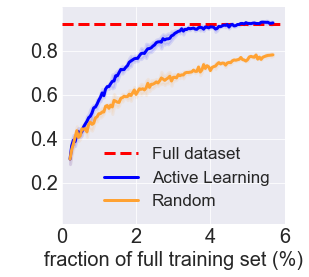

In [5]:
## First active learning result, query =10
#CSL: QUERY=5
#gsl,Irish_SL:query=50
dirr = "D:/AI_thesis/workshop_paper/np_result_28/"
ASL_unif = np.load(dirr + "ASL_MNIST_imbalunifcnnpre_trainFalse.npy")
ASL_bald = np.load(dirr + "ASL_MNIST_imbalbaldcnnpre_trainFalse.npy")
ASL_max = np.load(dirr +"ASL_MNIST_imbalmax_cnnpre_trainFalse.npy")
ASL_mean = np.load(dirr +"ASL_MNIST_imbalmeancnnpre_trainFalse.npy")
ASL_var = np.load(dirr +"ASL_MNIST_imbalvar_cnnpre_trainFalse.npy")
#plt.style.use('classic')
plt.style.use("seaborn-darkgrid")
make_plot(SL="ASL",unif=ASL_unif, bald=ASL_bald, maxX=ASL_max, mean=ASL_mean, var=ASL_var, query=10, training_data=22000,full_performance=0.92 )

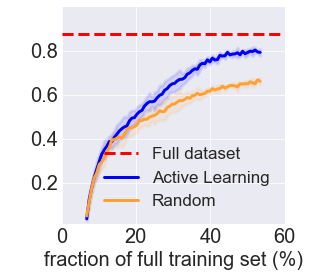

In [12]:
## First active learning result, query =10
#CSL: QUERY=5
#gsl,Irish_SL:query=50
Chinese_SL_unif = np.load("D:/AI_thesis/workshop_paper/np_result_28/Chinese_SL_MNIST_imbalunifcnnpre_trainFalse.npy")[:,:70]
Chinese_SL_bald = np.load("D:/AI_thesis/workshop_paper/np_result_28/Chinese_SL_MNIST_imbalbaldcnnpre_trainFalse.npy")[:,:70]
Chinese_SL_max = np.load("D:/AI_thesis/workshop_paper/np_result_28/Chinese_SL_MNIST_imbalmax_cnnpre_trainFalse.npy")[:,:70]
Chinese_SL_mean = np.load("D:/AI_thesis/workshop_paper/np_result_28/Chinese_SL_MNIST_imbalmeancnnpre_trainFalse.npy")[:,:70][:,:70]
Chinese_SL_var = np.load("D:/AI_thesis/workshop_paper/np_result_28/Chinese_SL_MNIST_imbalvar_cnnpre_trainFalse.npy")[:,:70]

make_plot(SL="Chinese_SL",unif=Chinese_SL_unif, bald=Chinese_SL_bald, maxX=Chinese_SL_max, mean=Chinese_SL_mean,var=Chinese_SL_var, query=5, training_data=740,full_performance=0.875 )

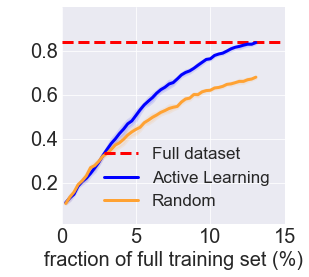

In [13]:
## First active learning result, query =10
#CSL: QUERY=5
#gsl,Irish_SL:query=50
GSL_unif = np.load("D:/AI_thesis/workshop_paper/np_result_28/GSL_MNIST_imbalunifcnnpre_trainFalse.npy")[:,:47]

GSL_bald = np.load("D:/AI_thesis/workshop_paper/np_result_28/GSL_MNIST_imbalbaldcnnpre_trainFalse.npy")[:,:47]
GSL_max = np.load("D:/AI_thesis/workshop_paper/np_result_28/GSL_MNIST_imbalmax_cnnpre_trainFalse.npy")[:,:47]
GSL_mean = np.load("D:/AI_thesis/workshop_paper/np_result_28/GSL_MNIST_imbalmeancnnpre_trainFalse.npy")[:,:47]
GSL_var = np.load("D:/AI_thesis/workshop_paper/np_result_28/GSL_MNIST_imbalvar_cnnpre_trainFalse.npy")[:,:47]

make_plot(SL="GSL",unif=GSL_unif, bald=GSL_bald, maxX=GSL_max, mean=GSL_mean,var=GSL_var, query=50, training_data=18000,full_performance=0.84 )

(5, 90)


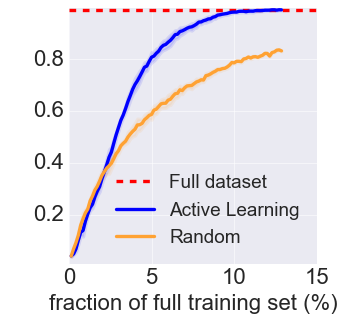

In [123]:
## First active learning result, query =10
#CSL: QUERY=5
#gsl,Irish_SL:query=50
Irish_SL_unif = np.load("D:/AI_thesis/workshop_paper/np_result_28/Irish_SL_MNIST_imbalunifcnnpre_trainFalse.npy")[:,:90]
print(Irish_SL_unif.shape)
Irish_SL_bald = np.load("D:/AI_thesis/workshop_paper/np_result_28/Irish_SL_MNIST_imbalbaldcnnpre_trainFalse.npy")[:,:90]
Irish_SL_max = np.load("D:/AI_thesis/workshop_paper/np_result_28/Irish_SL_MNIST_imbalmax_cnnpre_trainFalse.npy")[:,:90]
Irish_SL_mean = np.load("D:/AI_thesis/workshop_paper/np_result_28/Irish_SL_MNIST_imbalmeancnnpre_trainFalse.npy")[:,:90]
Irish_SL_var = np.load("D:/AI_thesis/workshop_paper/np_result_28/Irish_SL_MNIST_imbalvar_cnnpre_trainFalse.npy")[:,:90]

make_plot(SL="Irish_SL",unif=Irish_SL_unif, bald=Irish_SL_bald, maxX=Irish_SL_max, mean=Irish_SL_mean,var=Irish_SL_var, query=50, training_data=35000,full_performance=0.99 )

## Single active learning for reso = 96

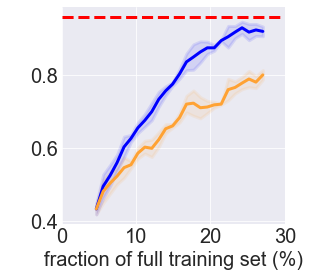

In [31]:
dirr = "D:/AI_thesis/workshop_paper/np_result_96/single_AL/"
ASL_unif = np.load(dirr + "ASL_MNIST_imbalunifcnnpre_trainFalse.npy")[:,:25]
ASL_var = np.load(dirr + "ASL_MNIST_imbalvar_cnnpre_trainFalse.npy")[:,:25]

make_plot(SL="ASL_96",unif=ASL_unif, bald=ASL_var, maxX=ASL_var, mean=ASL_var, var=ASL_var, query=10, training_data=1072,full_performance=0.96 )

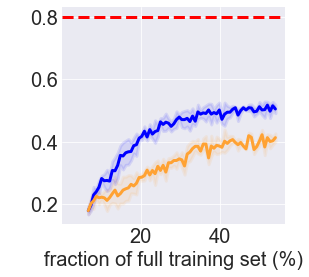

In [32]:
dirr = "D:/AI_thesis/workshop_paper/np_result_96/single_AL/"
Chinese_SL_unif = np.load(dirr + "Chinese_SL_MNIST_imbalunifcnnpre_trainFalse.npy")
Chinese_SL_var = np.load(dirr + "Chinese_SL_MNIST_imbalvar_cnnpre_trainFalse.npy")

make_plot(SL="Chinese_SL_96",unif=Chinese_SL_unif, bald=Chinese_SL_var, maxX=Chinese_SL_var, mean=Chinese_SL_var,var=Chinese_SL_var, query=5, training_data=740,full_performance=0.80 )

(3, 91)


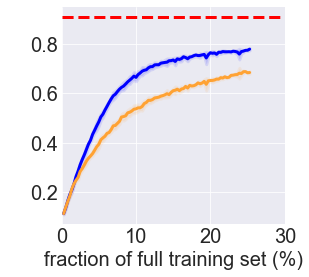

In [33]:
dirr = "D:/AI_thesis/workshop_paper/np_result_96/single_AL/"
GSL_unif = np.load(dirr + "GSL_MNIST_imbalunifcnnpre_trainFalse.npy")
GSL_var = np.load(dirr + "GSL_MNIST_imbalvar_cnnpre_trainFalse.npy")
print(GSL_unif.shape)
make_plot(SL="GSL_96", unif=GSL_unif, bald=GSL_var, maxX=GSL_var, mean=GSL_var,var=GSL_var, query=50, training_data=18000, full_performance=0.91 )

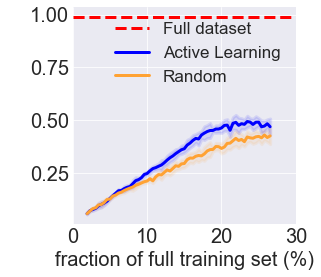

In [29]:
dirr = "D:/AI_thesis/workshop_paper/np_result_96/single_AL/"
Irish_SL_unif = np.load(dirr + "Irish_SL_MNIST_imbalunifcnnpre_trainFalse.npy")[:,:65]
Irish_SL_var = np.load(dirr + "Irish_SL_MNIST_imbalvar_cnnpre_trainFalse.npy")[:,:65]

make_plot(SL="Irish_SL_96",unif=Irish_SL_unif, bald=Irish_SL_var, maxX=Irish_SL_var, mean=Irish_SL_var,var=Irish_SL_var, query=10, training_data=2600,full_performance=0.99 )

## Transfer Active learning result

In [26]:
def make_transfer_plot(SL, scratch, pre_1, pre_2, pre_3, pre_4, query,name, training_data, full_performance, plot=True):
    scratch_mean = np.mean(scratch,axis=0 )
    scratch_std = [np.std(scratch[:,i]) for i in range(scratch.shape[1])]
    scratch_ci = [1.96 * i/np.sqrt(scratch.shape[0]) for i in scratch_std]
    
    pre_1_std = [np.std(pre_1[:,i]) for i in range(pre_1.shape[1])]
    pre_1_ci = [1.96 * i/np.sqrt(pre_1.shape[0]) for i in pre_1_std]
    pre_1_mean = np.mean(pre_1,axis=0 )
    
    pre_2_mean = np.mean(pre_2,axis=0 )
    pre_3_mean = np.mean(pre_3,axis=0 )
    pre_4_mean = np.mean(pre_4,axis=0)
    print(pre_4_mean.shape)
    print("scratch_mean.shape :",scratch_mean.shape)

    init_x= range(len(scratch_mean))
    x = [(i*query + 50)/training_data*100 for i in init_x]
    #print("percentage for iter =40: ", x[40])
    
    if plot == True:
        fig = plt.figure()
        fig.set_size_inches(6, 4)
        plt.axhline(y = full_performance, color = 'r', linestyle = '--',label="Full dataset")

        plt.plot(x,pre_1_mean, label=name[0])
        plt.plot(x,pre_2_mean, label=name[1])
        plt.plot(x,pre_3_mean, label=name[2],color="c")
        plt.plot(x,pre_4_mean, label=name[3],color="r")
        plt.plot(x,scratch_mean,label="No Pre-train",color='m' )
        
        

        plt.fill_between(x, (scratch_mean - scratch_ci), (scratch_mean + scratch_ci), color='m', alpha=.1)
        plt.fill_between(x, (pre_1_mean - pre_1_ci), (pre_1_mean+pre_1_ci), color='b', alpha=.1)

        plt.legend(fontsize=13.5,loc=4)
        plt.xlabel("fraction of full training set (%)",fontsize=18)
        plt.ylabel("test accuracy",fontsize=18)
        plt.ylim([0.01,0.99])
        #plt.title(SL+" transfer active learning result")
    
    if SL == "Irish_SL":
        plt.xticks([0,2,4,6,8])
    elif SL =="chinese_SL":
        plt.xticks([0,10,20,30,40,50])
    elif SL =="GSL":
        plt.xticks([0,5,10,15,20])
    elif SL =="ISL":
        plt.xticks([0,2,4,6,8])
    elif SL == "Irish_SL_96":
        plt.xticks([0,10,20,30])
    elif SL == "chinese_SL_96":
        plt.xticks([0,10,20,30,40,50])
    elif SL == "ASL_96":
        plt.xticks([0,10,20,30,40])
    elif SL == "GSL_96":
        print("Yes")
        plt.xticks([0,4,8,12,16])
        plt.xlim([0,16])
    
        
    fig.savefig('result_img/new_images/TF_AL_'+SL+'.pdf', bbox_inches='tight',dpi=400)
    result= {"scratch_mean":scratch_mean, "pre_1_mean": pre_1_mean, "pre_2_mean": pre_2_mean ,
             "pre_3_mean": pre_3_mean , "scratch_ci": scratch_ci, "pre_1_ci": pre_1_ci }
        
        
    return result

(5, 101)
(101,)
scratch_mean.shape : (101,)


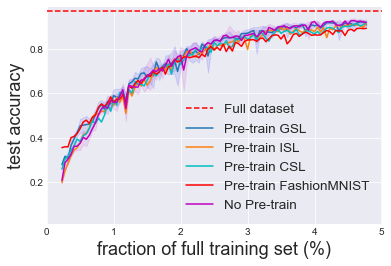

In [19]:
ASL_scratch = np.load("D:/AI_thesis/workshop_paper/np_result_28/ASL_MNIST_imbalvar_pre_trainFalse_res18.npy")
#ASL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/np_result/ASL_MNIST_imbalvar_pre_trainGSL_MNIST_imbal_res18.npy")
ASL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/np_result_28/ASL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal_2.npy")
ASL_pre_GSL=ASL_pre_GSL[:,:101]
print(ASL_pre_GSL.shape)
ASL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/np_result_28/ASL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")
ASL_pre_Irish = np.load("D:/AI_thesis/workshop_paper/np_result_28/ASL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal.npy")
ASL_pre_Chinese = np.load("D:/AI_thesis/workshop_paper/np_result_28/ASL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal.npy")
ASL_pre_Chinese=ASL_pre_Chinese[:,:101]

plt.style.use("seaborn-darkgrid")
#plt.style.use('classic')
name = ["Pre-train GSL", "Pre-train ISL","Pre-train CSL","Pre-train FashionMNIST" ]
result_ASL = make_transfer_plot(SL="ASL",scratch=ASL_scratch, pre_1=ASL_pre_GSL, pre_2=ASL_pre_Irish, pre_3=ASL_pre_Chinese,
                                pre_4 =ASL_pre_Fashion, name=name, query=10, training_data=22000, full_performance=0.97, plot=True )

(55,)
scratch_mean.shape : (55,)


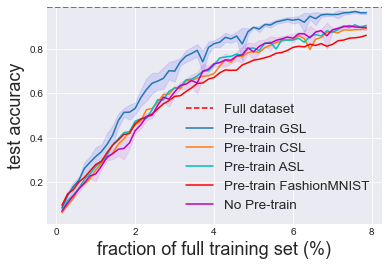

In [22]:
Irish_SL_scratch = np.load("D:/AI_thesis/workshop_paper/np_result_28/Irish_SL_MNIST_imbalvar_res18pre_trainFalse.npy")[:,:55]
Irish_SL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/np_result_28/Irish_SL_MNIST_imbalvar_pre_trainGSL_MNIST_imbal.npy")[:,:55]
Irish_SL_pre_ASL = np.load("D:/AI_thesis/workshop_paper/np_result_28/Irish_SL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal.npy")[:,:55]
Irish_SL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/np_result_28/Irish_SL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")[:,:55]
Irish_SL_pre_Chinese = np.load("D:/AI_thesis/workshop_paper/np_result_28/Irish_SL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal.npy")[:,:55]

for i in [Irish_SL_scratch, Irish_SL_pre_GSL,Irish_SL_pre_ASL,Irish_SL_pre_Fashion,Irish_SL_pre_Chinese ]:
    i = i[:,:55]

name = ["Pre-train GSL", "Pre-train CSL", "Pre-train ASL", "Pre-train FashionMNIST" ]
result_Irish_SL = make_transfer_plot(SL="Irish_SL",scratch=Irish_SL_scratch, pre_1=Irish_SL_pre_GSL, pre_2=Irish_SL_pre_Chinese, pre_3=Irish_SL_pre_ASL,
                                     pre_4 = Irish_SL_pre_Fashion, name=name, query=50, training_data=35000, full_performance=0.99, plot=True )

(70,)
scratch_mean.shape : (70,)


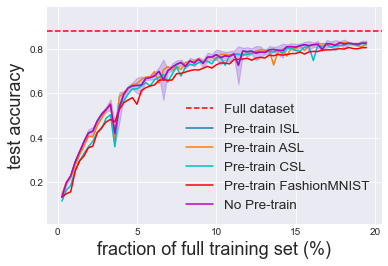

In [9]:
GSL_scratch = np.load("D:/AI_thesis/workshop_paper/np_result_28/Irish_SL_MNIST_imbalvar_res18pre_trainFalse.npy")[:,:70]
GSL_pre_Irish_SL = np.load("D:/AI_thesis/workshop_paper/np_result_28/GSL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal.npy")[:,:70]
GSL_pre_ASL = np.load("D:/AI_thesis/workshop_paper/np_result_28/GSL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal.npy")[:,:70]
GSL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/np_result_28/GSL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")[:,:70]
GSL_pre_Chinese = np.load("D:/AI_thesis/workshop_paper/np_result_28/GSL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal.npy")[:,:70]



name = ["Pre-train ISL", "Pre-train ASL","Pre-train CSL","Pre-train FashionMNIST" ]
result_GSL = make_transfer_plot(SL="GSL",scratch=GSL_pre_Irish_SL, pre_1=GSL_pre_Irish_SL, pre_2=GSL_pre_ASL, pre_3=GSL_pre_Chinese,
                                pre_4=GSL_pre_Fashion, name=name, query=50, training_data=18000,full_performance=0.88  )

(63,)
scratch_mean.shape : (63,)


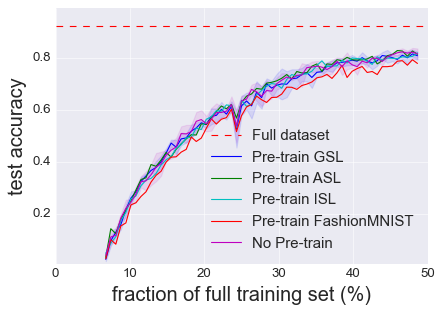

In [204]:
Chinese_SL_scratch = np.load("D:/AI_thesis/workshop_paper/np_result_28/Chinese_SL_MNIST_imbalvar_res18pre_trainFalse.npy")[:,:63]

Chinese_SL_pre_Irish_SL = np.load("D:/AI_thesis/workshop_paper/np_result_28/Chinese_SL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal.npy")[:,:63]
Chinese_SL_pre_ASL = np.load("D:/AI_thesis/workshop_paper/np_result_28/Chinese_SL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal.npy")[:,:63]
Chinese_SL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/np_result_28/Chinese_SL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")[:,:63]
Chinese_SL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/np_result_28/Chinese_SL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal.npy")[:,:63]


name = ["Pre-train GSL","Pre-train ASL","Pre-train ISL", "Pre-train FashionMNIST"]
result_CSL = make_transfer_plot(SL="chinese_SL",scratch=Chinese_SL_scratch, pre_1=Chinese_SL_pre_GSL, pre_2=Chinese_SL_pre_ASL, pre_3=Chinese_SL_pre_Irish_SL,
                                pre_4 =Chinese_SL_pre_Fashion, name=name, query=5, training_data=740,full_performance=0.92 )

## Res=96 transfer active learning result

(38,)
scratch_mean.shape : (38,)


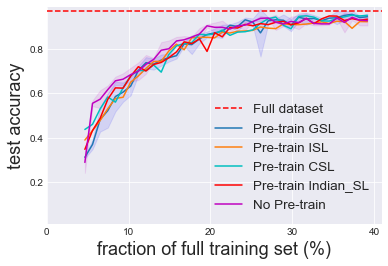

In [14]:
ASL_scratch = np.load("D:/AI_thesis/workshop_paper/np_result_96/ASL_MNIST_imbalvar_res18pre_trainFalse_96.npy")[:,:38]
ASL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/np_result_96/ASL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal_96.npy")[:,:38]
ASL_pre_Chinese_SL = np.load("D:/AI_thesis/workshop_paper/np_result_96/ASL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal_96.npy")[:,:38]
ASL_pre_Irish = np.load("D:/AI_thesis/workshop_paper/np_result_96/ASL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal_96.npy")[:,:38]
ASL_pre_Indian = np.load("D:/AI_thesis/workshop_paper/np_result_96/ASL_MNIST_imbalvar_res18pre_trainIndian_SL_MNIST_imbal_96.npy")[:,:38]

plt.style.use("seaborn-darkgrid")
#plt.style.use('classic')
name = ["Pre-train GSL", "Pre-train ISL","Pre-train CSL","Pre-train Indian_SL" ]
result_ASL = make_transfer_plot(SL="ASL_96",scratch=ASL_scratch, pre_1=ASL_pre_GSL, pre_2=ASL_pre_Irish, pre_3=ASL_pre_Chinese_SL,
                                pre_4 =ASL_pre_Indian, name=name, query=10, training_data=1072, full_performance=0.97, plot=True )

(63,)
scratch_mean.shape : (63,)


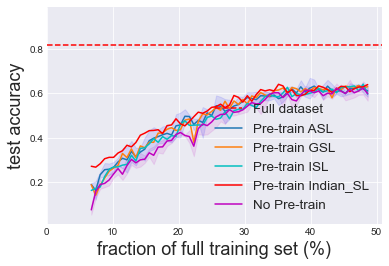

In [4]:
dirr = "D:/AI_thesis/workshop_paper/np_result_96/"
Chinese_SL_scratch = np.load(dirr + "Chinese_SL_MNIST_imbalvar_res18pre_trainFalse_96.npy")[:,:63]
Chinese_SL_pre_Irish_SL = np.load(dirr+"Chinese_SL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal_96.npy")[:,:63]
Chinese_SL_pre_ASL = np.load(dirr + "Chinese_SL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal_96.npy")[:,:63]
Chinese_SL_pre_Indian_SL = np.load(dirr+"Chinese_SL_MNIST_imbalvar_res18pre_trainIndian_MNIST_imbal_96.npy")[:,:63]
Chinese_SL_pre_GSL = np.load(dirr + "Chinese_SL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal_96.npy")[:,:63]


name = ["Pre-train ASL","Pre-train GSL","Pre-train ISL", "Pre-train Indian_SL"]
result_CSL = make_transfer_plot(SL="chinese_SL_96",scratch=Chinese_SL_scratch, pre_1=Chinese_SL_pre_ASL, pre_2=Chinese_SL_pre_GSL, pre_3=Chinese_SL_pre_Irish_SL,
                                pre_4 =Chinese_SL_pre_Indian_SL, name=name, query=5, training_data=740,full_performance=0.82 )

(57,)
scratch_mean.shape : (57,)
Yes


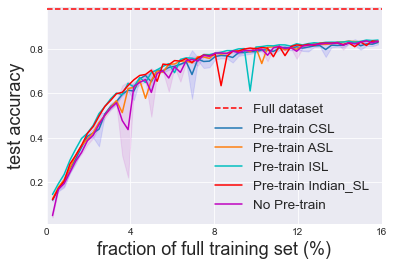

In [27]:
dirr = "D:/AI_thesis/workshop_paper/np_result_96/"
GSL_scratch = np.load(dirr + "GSL_MNIST_imbalvar_res18pre_trainFalse_96.npy")[:,:57]
GSL_pre_Irish_SL = np.load(dirr+"GSL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal_96.npy")[:,:57]
GSL_pre_ASL = np.load(dirr + "GSL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal_96.npy")[:,:57]
GSL_pre_Indian_SL = np.load(dirr+"GSL_MNIST_imbalvar_res18pre_trainIndian_MNIST_imbal_96.npy")[:,:57]
GSL_pre_Chinese_SL = np.load(dirr + "GSL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal_96.npy")[:,:57]


name = ["Pre-train CSL","Pre-train ASL","Pre-train ISL", "Pre-train Indian_SL"]
result_GSL = make_transfer_plot(SL="GSL_96",scratch=GSL_scratch, pre_1=GSL_pre_Chinese_SL, pre_2=GSL_pre_ASL, pre_3=GSL_pre_Irish_SL,
                                pre_4 =GSL_pre_Indian_SL, name=name, query=50, training_data=18000,full_performance=0.98 )

(73,)
scratch_mean.shape : (73,)


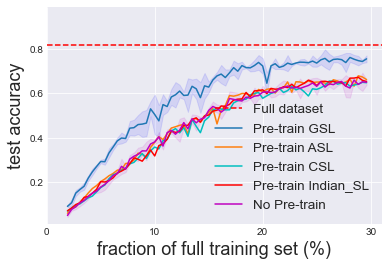

In [17]:
Irish_SL_scratch = np.load("D:/AI_thesis/workshop_paper/np_result_96/Irish_SL_MNIST_imbalvar_res18pre_trainFalse_96.npy")[:,:73]
Irish_SL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/np_result_96/Irish_SL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal_96.npy")[:,:73]
Irish_SL_pre_ASL = np.load("D:/AI_thesis/workshop_paper/np_result_96/Irish_SL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal_96.npy")[:,:73]
Irish_SL_pre_Indian_SL = np.load("D:/AI_thesis/workshop_paper/np_result_96/Irish_SL_MNIST_imbalvar_res18pre_trainIndian_MNIST_imbal_96.npy")[:,:73]
Irish_SL_pre_Chinese = np.load("D:/AI_thesis/workshop_paper/np_result_96/Irish_SL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal_96.npy")[:,:73]

#for i in [Irish_SL_scratch, Irish_SL_pre_GSL,Irish_SL_pre_ASL,Irish_SL_pre_Fashion,Irish_SL_pre_Chinese ]:
#    i = i[:,:80]

name = ["Pre-train GSL", "Pre-train ASL", "Pre-train CSL","Pre-train Indian_SL" ]
result_Irish_SL = make_transfer_plot(SL="Irish_SL_96",scratch=Irish_SL_scratch, pre_1=Irish_SL_pre_GSL, pre_2=Irish_SL_pre_ASL, pre_3=Irish_SL_pre_Chinese,
                                     pre_4 = Irish_SL_pre_Indian_SL, name=name, query=10, training_data=2600, full_performance=0.82, plot=True )

### visualize their cnfusion matrix

In [176]:
def make_con_mat_plot(SL, scratch, pre_1, pre_2, pre_3, pre_4, iterr_num ,name):
    """Make plots for viaualizing confusion matrix"""
    
    all_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]

    con_scratch =np.array([scratch[i,iterr_num].diagonal()/scratch[i,iterr_num].sum(axis=1) for i in range(scratch.shape[0])])
    con_scratch_mean = con_scratch.mean(axis=0)
    print(con_scratch_mean.shape)
    con_scratch_std = con_scratch.std(axis=0)
    con_scratch_ci = [1.96 * i/np.sqrt(scratch.shape[0]) for i in con_scratch_std]
    
    con_pre_1 =np.array([pre_1[i,iterr_num].diagonal()/pre_1[i,iterr_num].sum(axis=1) for i in range(pre_1.shape[0])])
    con_pre_1_mean = con_pre_1.mean(axis=0)
    con_pre_1_std = con_pre_1.std(axis=0)
    con_pre_1_ci = [1.96 * i/np.sqrt(pre_1.shape[0]) for i in con_pre_1_std]
    
    whole_scratch_mean = np.mean([sum(scratch[i,iterr_num].diagonal())/sum(sum(scratch[i,iterr_num])) for i in range(scratch.shape[0])])
    print("Accuracy for training from scratcch is :", whole_scratch_mean)
    whole_pre_1_mean = np.mean([sum(pre_1[i,iterr_num].diagonal())/sum(sum(pre_1[i,iterr_num])) for i in range(pre_1.shape[0])])
    print("Accuracy for training from "+name[0]+" is :", whole_pre_1_mean)
    
    
    con_pre_2 =np.array([pre_2[i,iterr_num].diagonal()/pre_2[i,iterr_num].sum(axis=1) for i in range(pre_2.shape[0])])
    con_pre_2_mean = con_pre_2.mean(axis=0)
    
    con_pre_3 =np.array([pre_3[i,iterr_num].diagonal()/pre_3[i,iterr_num].sum(axis=1) for i in range(pre_3.shape[0])])
    con_pre_3_mean = con_pre_3.mean(axis=0)
    
    con_pre_4 =np.array([pre_4[i,iterr_num].diagonal()/pre_4[i,iterr_num].sum(axis=1) for i in range(pre_4.shape[0])])
    con_pre_4_mean = con_pre_4.mean(axis=0)
    
    
    init_x= range(len(con_scratch_mean))
    

    fig, ax = plt.subplots()
    fig.set_size_inches(8, 1.2)
    
    x = [i for i in range(24)]
    if  SL == "Irish_SL":
        plt.plot(x, con_pre_1_mean, label=name[0])
    else: 
        plt.plot(x, con_pre_1_mean, label=name[0],color='m')
    plt.plot(x, con_scratch_mean, label="No Pre-training",color="g")
    #plt.plot(x, con_pre_2_mean, label=name[1])
    #plt.plot(x, con_pre_3_mean, label=name[2])
    #plt.plot(x, con_pre_4_mean, label=name[3])

    
    plt.fill_between(x, (con_scratch_mean - con_scratch_ci), (con_scratch_mean + con_scratch_ci), color='g', alpha=.1)
    plt.fill_between(x, (con_pre_1_mean - con_pre_1_ci), (con_pre_1_mean+ con_pre_1_ci), color='b', alpha=.1)

    ax.set_xticks([i for i in range(24)])
    ax.set_xlabel("alphabet")
    ax.set_ylabel("accuracy")
    ax.set_xticklabels( all_Alphabet_list )
    if "Irish_SL" in SL:
        plt.gca().get_xticklabels()[6].set_color("red")
        plt.gca().get_xticklabels()[7].set_color("red")
        plt.gca().get_xticklabels()[9].set_color("red")
        plt.gca().get_xticklabels()[10].set_color("red")
        plt.gca().get_xticklabels()[14].set_color("red")
        plt.gca().get_xticklabels()[15].set_color("red")
        plt.gca().get_xticklabels()[18].set_color("red")
        plt.gca().get_xticklabels()[22].set_color("red")
    if "ASL" in SL and name[0]=="Pre-training CSL":
        plt.gca().get_xticklabels()[3].set_color("red")
        plt.gca().get_xticklabels()[4].set_color("red")
        plt.gca().get_xticklabels()[5].set_color("red")
        plt.gca().get_xticklabels()[7].set_color("red")
        plt.gca().get_xticklabels()[8].set_color("red")
        plt.gca().get_xticklabels()[9].set_color("red")
        plt.gca().get_xticklabels()[14].set_color("red")
        plt.gca().get_xticklabels()[15].set_color("red")
        plt.gca().get_xticklabels()[16].set_color("red")
        plt.gca().get_xticklabels()[17].set_color("red")
        plt.gca().get_xticklabels()[18].set_color("red")
        plt.gca().get_xticklabels()[19].set_color("red")
        plt.gca().get_xticklabels()[23].set_color("red")
    if "CSL" in SL and name[0]=="Pre-training ASL":
        for i in [3,4,5,7,8,9,14,15,16,17,18,19,22]:
            plt.gca().get_xticklabels()[i].set_color("red")

        
        
        
        
    #plt.legend(fontsize=80,loc=4)
    #leg = plt.legend(fontsize=80,loc=4)
    #leg.get_lines()[0].set_linewidth(6)
    #leg.get_lines()[1].set_linewidth(6)
    #leg.get_lines()[2].set_linewidth(6)
    #plt.title(SL+" transfer active learning result")
    plt.yticks([0.2, 0.4, 0.6,0.8,1.0])
    plt.xlim([0,23])
    plt.ylim([0.0,1.02])
    plt.rcParams['axes.labelsize'] = 12
    fig.savefig('result_img/new_images/cm_'+SL+'.png', dpi=2000,bbox_inches='tight')

(24,)
Accuracy for training from scratcch is : 0.7549599999999999
Accuracy for training from Pre-training CSL is : 0.7674399999999999


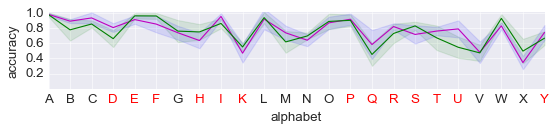

In [54]:
## ASL
con_ASL_scratch = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_ASL_MNIST_imbalvar_res18pre_trainFalse.npy")
con_ASL_pre_Irish = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_ASL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal.npy")
con_ASL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_ASL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal.npy")
con_ASL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_ASL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")
con_ASL_pre_Chinese = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_ASL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal.npy")


#plt.style.use('classic')
plt.style.use("seaborn-darkgrid")
name = ["Pre-training CSL" , "Pretrain_GSL" ,"pretrain_Irish_SL","pretrain_Fashion"]
make_con_mat_plot(SL="ASL",scratch=con_ASL_scratch, pre_1=con_ASL_pre_Chinese, pre_2=con_ASL_pre_Irish, pre_3=con_ASL_pre_Fashion,
                  pre_4 =con_ASL_pre_Chinese, name=name,iterr_num=40)

(24,)
Accuracy for training from scratcch is : 0.804889298892989
Accuracy for training from Pre-training GSL is : 0.8967712177121772


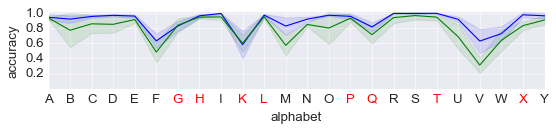

In [166]:
con_Irish_SL_scratch = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_Irish_SL_MNIST_imbalvar_res18pre_trainFalse.npy")
con_Irish_SL_pre_ASL = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_Irish_SL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal.npy")
con_Irish_SL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_Irish_SL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal.npy")
con_Irish_SL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_Irish_SL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")
con_Irish_pre_Chinese = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_Irish_SL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal.npy")


name = ["Pre-training GSL" ,"pretrain_Irish_SL","pretrain_Fashion", "pretrain_Chinese_SL" ]
make_con_mat_plot(SL="Irish_SL",scratch=con_Irish_SL_scratch, pre_1=con_Irish_SL_pre_GSL, pre_2=con_Irish_SL_pre_ASL, pre_3=con_ASL_pre_Fashion,
                  pre_4 = con_Irish_pre_Chinese, name=name,iterr_num=40)

(24,)
Accuracy for training from scratcch is : 0.7625456442357852
Accuracy for training from pretrain_ISL is : 0.780699008868023


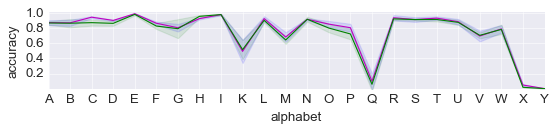

In [59]:
con_GSL_scratch = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_GSL_MNIST_imbalvar_res18pre_trainFalse.npy")
con_GSL_pre_Irish = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_GSL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal.npy")
con_GSL_pre_ASL = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_GSL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal.npy")
con_GSL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_GSL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")
con_GSL_pre_Chinese = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_GSL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal.npy")


name = ["pretrain_ISL", "Pretrain_ASL" , "pretrain_Fashion", "pretrain_Chinese_SL" ]
make_con_mat_plot(SL="GSL",scratch=con_GSL_scratch, pre_1=con_GSL_pre_Irish, pre_2=con_GSL_pre_ASL, pre_3=con_GSL_pre_Fashion,
                  pre_4= con_GSL_pre_Chinese, name=name, iterr_num=40)

(24,)
Accuracy for training from scratcch is : 0.7641975308641976
Accuracy for training from pretrain_ASL is : 0.7672839506172839


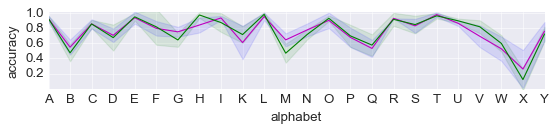

In [60]:
con_Chinese_SL_scratch = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_Chinese_SL_MNIST_imbalvar_res18pre_trainFalse.npy")
con_Chinese_SL_pre_ASL = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_Chinese_SL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal.npy")
con_Chinese_SL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_Chinese_SL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal.npy")
con_Chinese_SL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_Chinese_SL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")
con_Chinese_SL_pre_Irish = np.load("D:/AI_thesis/workshop_paper/con_mat_28/con_mat_Chinese_SL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal.npy")

name = ["pretrain_ASL" ,"pretrain_GSL","pretrain_Fashion","pretrain_Irish_SL" ]
make_con_mat_plot(SL="Chinese_SL",scratch=con_Chinese_SL_scratch, pre_1=con_Chinese_SL_pre_ASL, pre_2=con_Chinese_SL_pre_GSL, pre_3=con_Chinese_SL_pre_Fashion,
                  pre_4=con_Chinese_SL_pre_Irish, name=name,iterr_num=40)

## RESULT of resolution=96

(24,)
Accuracy for training from scratcch is : 0.9469847581179588
Accuracy for training from Pre-training CSL is : 0.9443339960238569


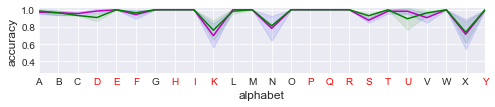

In [14]:
## ASL
con_ASL_scratch = np.load("D:/AI_thesis/workshop_paper/con_mat_96/con_mat_ASL_MNIST_imbalvar_res18pre_trainFalse.npy")
con_ASL_pre_Irish = np.load("D:/AI_thesis/workshop_paper/con_mat_96/con_mat_ASL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal.npy")
con_ASL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/con_mat_96/con_mat_ASL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal.npy")
con_ASL_pre_Indian = np.load("D:/AI_thesis/workshop_paper/con_mat_96/con_mat_ASL_MNIST_imbalvar_res18pre_trainIndian_SL_MNIST_imbal.npy")
con_ASL_pre_Chinese = np.load("D:/AI_thesis/workshop_paper/con_mat_96/con_mat_ASL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal.npy")


#plt.style.use('classic')
plt.style.use("seaborn-darkgrid")
name = ["Pre-training CSL" , "Pretrain_GSL" ,"pretrain_Irish_SL","pretrain_Indian"]
make_con_mat_plot(SL="ASL",scratch=con_ASL_scratch, pre_1=con_ASL_pre_Chinese, pre_2=con_ASL_pre_Irish, pre_3=con_ASL_pre_Indian,
                  pre_4 =con_ASL_pre_Chinese, name=name, iterr_num=40)

(24,)
Accuracy for training from scratcch is : 0.5586419753086419
Accuracy for training from Pre-training ASL is : 0.6172839506172839


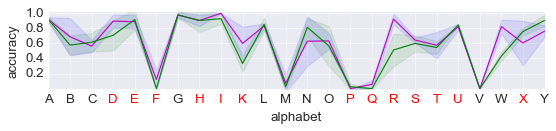

In [177]:
## CSL
con_CSL_scratch = np.load("D:/AI_thesis/workshop_paper/con_mat_96/con_mat_Chinese_SL_MNIST_imbalvar_res18pre_trainFalse.npy")
con_CSL_pre_Irish = np.load("D:/AI_thesis/workshop_paper/con_mat_96/con_mat_Chinese_SL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal.npy")
con_CSL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/con_mat_96/con_mat_Chinese_SL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal.npy")
con_CSL_pre_Indian = np.load("D:/AI_thesis/workshop_paper/con_mat_96/con_mat_Chinese_SL_MNIST_imbalvar_res18pre_trainIndian_MNIST_imbal.npy")
con_CSL_pre_ASL = np.load("D:/AI_thesis/workshop_paper/con_mat_96/con_mat_Chinese_SL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal.npy")


#plt.style.use('classic')
plt.style.use("seaborn-darkgrid")
name = ["Pre-training ASL" , "Pre-training GSL" ,"pretrain_Irish_SL","pretrain_Indian"]
make_con_mat_plot(SL="CSL_96",scratch=con_CSL_scratch, pre_1=con_CSL_pre_ASL, pre_2=con_CSL_pre_GSL, pre_3=con_CSL_pre_Irish,
                  pre_4 =con_CSL_pre_Indian, name=name, iterr_num=50)

(24,)
Accuracy for training from scratcch is : 0.5724962630792226
Accuracy for training from Pre-training GSL is : 0.6998505231689088


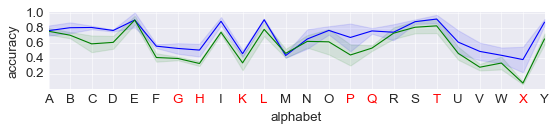

In [169]:
con_Irish_SL_scratch = np.load("D:/AI_thesis/workshop_paper/con_mat_96/con_mat_Irish_SL_MNIST_imbalvar_res18pre_trainFalse.npy")
con_Irish_SL_pre_ASL = np.load("D:/AI_thesis/workshop_paper/con_mat_96/con_mat_Irish_SL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal.npy")
con_Irish_SL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/con_mat_96/con_mat_Irish_SL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal.npy")
con_Irish_SL_pre_Indian = np.load("D:/AI_thesis/workshop_paper/con_mat_96/con_mat_Irish_SL_MNIST_imbalvar_res18pre_trainIndian_MNIST_imbal.npy")
con_Irish_pre_Chinese = np.load("D:/AI_thesis/workshop_paper/con_mat_96/con_mat_Irish_SL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal.npy")


name = ["Pre-training GSL" ,"pretrain_Irish_SL","pretrain_Indian", "pretrain_Chinese_SL" ]
make_con_mat_plot(SL="Irish_SL",scratch=con_Irish_SL_scratch, pre_1=con_Irish_SL_pre_GSL, pre_2=con_ASL_pre_Irish, pre_3=con_Irish_SL_pre_Indian,
                  pre_4 = con_Irish_pre_Chinese, name=name,iterr_num=40)

## The combined plot for paper

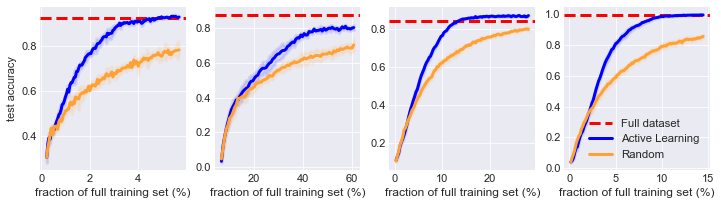

In [21]:
plt.style.use("seaborn-darkgrid")

names =  locals()
data_list=["ASL_", "Chinese_SL_", "GSL_", "Irish_SL_"]
query_dict={"ASL_":10, "Chinese_SL_":5, "GSL_":50, "Irish_SL_":50}
data_am_dict = {"ASL_":22000, "Chinese_SL_":740, "GSL_":18000, "Irish_SL_":35000} 
full_performance_list = {"ASL_":0.92 , "Chinese_SL_": 0.875, "GSL_": 0.84, "Irish_SL_": 0.99}

fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(12, 3)
ax1.set_ylabel('test accuracy', Fontsize=11)
for num, i in enumerate(data_list):
    sign_corp = data_list[num]
    unif = names[sign_corp+"unif"]
    names[sign_corp+"unif_mean"]  = np.mean(unif,axis=0 )
    names[sign_corp+"unif_std"] = [np.std(unif[:,i]) for i in range(unif.shape[1])]
    names[sign_corp+"unif_ci"] = [1.96 * i/np.sqrt(unif.shape[0]) for i in names[sign_corp+"unif_std"] ]
    
    var = names[sign_corp+"var"]
    names[sign_corp+"var_mean"]  = np.mean(var,axis=0 )
    names[sign_corp+"var_std"] = [np.std(var[:,i]) for i in range(var.shape[1])]
    names[sign_corp+"var_ci"] = [1.96 * i/np.sqrt(var.shape[0]) for i in names[sign_corp+"var_std"] ]
    
    init_x = range(len(names[sign_corp+"unif_mean"]))
    x = [(i*query_dict[sign_corp] + 50)/data_am_dict[sign_corp]*100 for i in init_x]
    ax = names["ax"+str(num+1)]
    
    ax.axhline(y = full_performance_list[sign_corp], color = 'r', linestyle = '--',label="Full dataset", linewidth=3)
    
    ax.plot(x,names[sign_corp+"var_mean"], color = "b", label= "Active Learning", linewidth=3)
    ax.fill_between(x, (names[sign_corp+"var_mean"]-names[sign_corp+"var_ci"]), (names[sign_corp+"var_mean"]+names[sign_corp+"var_ci"]), color='b', linewidth=3, alpha=.1)
    
    ax.plot(x, names[sign_corp+"unif_mean"], color = "#FFA233",label="Random", linewidth=3)
    ax.fill_between(x, (names[sign_corp+"unif_mean"]-names[sign_corp+"unif_ci"]), (names[sign_corp+"unif_mean"]+names[sign_corp+"unif_ci"]), color='#FFA233', linewidth=3, alpha=.1)
    
    #plt.ylabel("test accuracy")
    if num ==3:
        plt.legend(loc=4,fontsize=11.4)
        
    ax.set_xlabel("fraction of full training set (%)", Fontsize=12)
    ax.tick_params(axis='x', labelsize=11 )
    ax.tick_params(axis='y', labelsize=11 )
    #names["ax"+str(num+1)].legend()
    
    #plt.savefig('result_img/new_images/AL'+sign_corp+'.pdf',bbox_inches=extent)



## Read and visualize image in dataset

In [3]:
name=["A","B","C","D","E","F","g","H","I","k","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
def display_images(in_, out, label, n=1, count=False,alphabet=False):
    """Display image from a """
    title_set = True
    for N in range(n):
        if in_ is not None:
            in_pic = in_.data.cpu().view(-1, 28, 28)
            plt.figure(figsize=(5, 4))
        if not title_set:
            plt.suptitle(label, color='w', fontsize=20)
        for i in range(6):
            plt.subplot(1,6,i+1)
            plt.imshow(in_pic[i+6*N])
            plt.axis('off')

In [32]:
GSL_train = pd.read_csv("D:/AI_thesis/Sign_dataset/sampled_sign_mnist_train_full.csv") 
GSL_train = GSL_train.to_numpy()[:,1:]

(27455, 784)


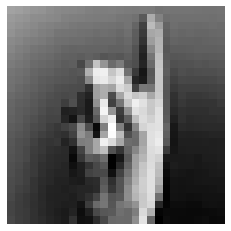

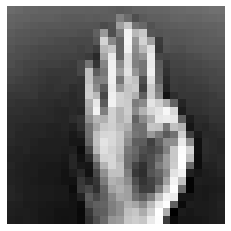

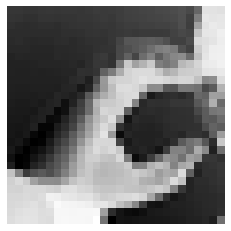

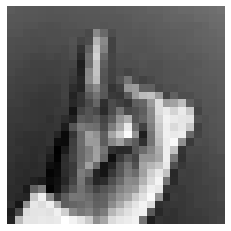

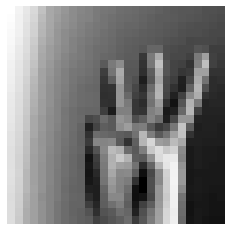

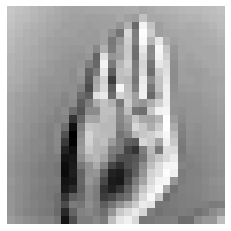

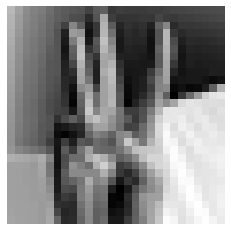

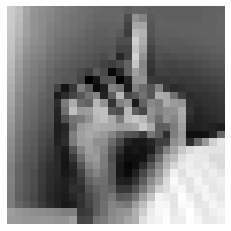

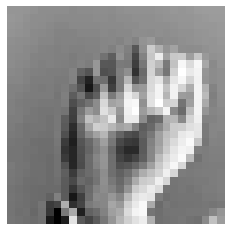

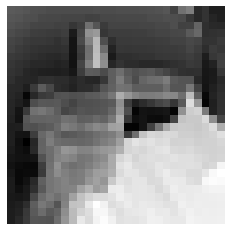

In [33]:
print(GSL_train.shape)
for i in range(10):
    img0 = GSL_train[i].reshape((28,28))
    plt.imshow(img0)
    plt.axis('off')
    plt.show()
    save_path= "D:/AI_thesis/active_learning/pytorch-saliency-maps-master/sign_examples/ASL_28/ASL_"+str(i)+".png"
    plt.imsave(save_path, img0)